In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
URL = 'https://countrymusichalloffame.org/artist/roy-acuff/'
page = requests.get(URL)
page.content

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [3]:
soup = BeautifulSoup(page.content, 'lxml')
#get death and birth dates as well
artist_info =soup.find_all('div', class_='fl-rich-text detail-wrapper')
artist_info

[<div class="fl-rich-text detail-wrapper">
 <p>INDUCTED :  1962</p>
 <h1>Roy Acuff</h1>
 <p></p><p>Roy Claxton Acuff emerged as a star during the early 1940s.</p>
 <p style="margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;">Birth: September 15, 1903 - Death: November 23, 1992 <br/> Birthplace: Maynardville, Tennessee </p>
 </div>]

In [4]:
#DOES THIS WORK (artist.find) BECAUSE ITS A VARIABLE DEFINED WITH A SOUP VARIABLE??
#two for loops to pull info from artist's page, then 

for artist in artist_info:
    induction_year = artist.find_all('p')[0].text.replace('INDUCTED :', '').strip()
    name = artist.find('h1').text.strip()
    #try:
    other, birthplace = artist.find_all('p')[3].text.split('Birthplace: ')
    #birthplace = other[1]
#     except IndexError:
#         other = 'n/a' 
        
    print(induction_year, '\n', name, '\n', other, '\n', birthplace)
    
    
#     induction_year = artist.find('p').text.replace('INDUCTED :', '').strip()
#     name = artist.find('h1').text.strip()
#     birth = artist.get_text('p') #str(artist.find_all(string=re.compile('Birth:'))) #.split('-')
#     #How to format differently?
#     #birth.strip()
#     #death.strip()
#     print(birth)
    
# dict= {} 

# for i in keys:
#     dict['inducted'] = induction_year
#     dict['name'] = name
#     dict['birth'] = birth
#     dict['death'] = death

# print(dict)    

1962 
 Roy Acuff 
 Birth: September 15, 1903 - Death: November 23, 1992   
 Maynardville, Tennessee 


In [5]:


f_URL = 'https://countrymusichalloffame.org/hall-of-fame/members/'
URL_pages = []
page = 1
for n in range(0,16):
    address = f_URL+'page/'+str(page)
    URL_pages.append(address)
    page +=1
#URL_pages

member_URL = []

for num in URL_pages:
    page = requests.get(num)
    soup = BeautifulSoup(page.content, 'lxml')
    for i in range(len(soup.find_all('h3'))):
        name = soup.find_all('h3')[i].text.replace(' ','-')
        name_URL = 'https://countrymusichalloffame.org/' + 'artist/'+ name
        member_URL.append(name_URL)
member_URL


['https://countrymusichalloffame.org/artist/Roy-Acuff',
 'https://countrymusichalloffame.org/artist/Alabama',
 'https://countrymusichalloffame.org/artist/Bill-Anderson',
 'https://countrymusichalloffame.org/artist/Eddy-Arnold',
 'https://countrymusichalloffame.org/artist/Chet-Atkins',
 'https://countrymusichalloffame.org/artist/Gene-Autry',
 'https://countrymusichalloffame.org/artist/DeFord-Bailey',
 'https://countrymusichalloffame.org/artist/Bobby-Bare',
 'https://countrymusichalloffame.org/artist/Johnny-Bond',
 'https://countrymusichalloffame.org/artist/Bobby-Braddock',
 'https://countrymusichalloffame.org/artist/Harold-Bradley',
 'https://countrymusichalloffame.org/artist/Jerry-Bradley',
 'https://countrymusichalloffame.org/artist/Owen-Bradley',
 'https://countrymusichalloffame.org/artist/Rod-Brasfield',
 'https://countrymusichalloffame.org/artist/Garth-Brooks',
 'https://countrymusichalloffame.org/artist/Brooks-&-Dunn',
 'https://countrymusichalloffame.org/artist/Jim-Ed-Brown',
 'h

In [6]:
#this might not be 100% accurate in finding those with SOME data (for instance, Jerry Bradley)
artist_dict = {'inducted':[],'name':[],'birth_death':[],'birthplace':[]}

for bio in member_URL:
    page = requests.get(bio)
    soup = BeautifulSoup(page.content, 'lxml')
    info = soup.find_all('div', class_='fl-rich-text detail-wrapper')

    for tag in info:
        induction_year = tag.find_all('p')[0].text.replace('INDUCTED :', '').strip()
        name = tag.find('h1').text.strip()
        try:
            b_d, birthplace = tag.find_all('p')[3].text.split('Birthplace: ')
            #data = re.split("Birth:|Death:|Birthplace:", other)
        except:
            b_d = 'n/a'
            birthplace = 'n/a'
        
        artist_dict['inducted'].append(induction_year)
        artist_dict['name'].append(name)
        artist_dict['birth_death'].append(b_d)
        artist_dict['birthplace'].append(birthplace)
            
    #print(induction_year, '\n', name, '\n', data, '\n')
        
artist_dict


{'inducted': ['1962',
  '2005',
  '2001',
  '1966',
  '1973',
  '1969',
  '2005',
  '2013',
  '1999',
  '2011',
  '2006',
  '2019',
  '1974',
  '1987',
  '2012',
  '2019',
  '2015',
  '2015',
  '1991',
  '2005',
  '2002',
  '1970',
  '1980',
  '2009',
  '2013',
  '1973',
  '2014',
  '1976',
  '2003',
  '1981',
  '2016',
  '1972',
  '2010',
  '2001',
  '1966',
  '1983',
  '2007',
  '2001',
  '1985',
  '2004',
  '1967',
  '1990',
  '2016',
  '1967',
  '1982',
  '1980',
  '2001',
  '2007',
  '2018',
  '1994',
  '2008',
  '2008',
  '1966',
  '2001',
  '1982',
  '1997',
  '2010',
  '2017',
  '2006',
  '2001',
  '1992',
  '1978',
  '2001',
  '1974',
  '2004',
  '2001',
  '1997',
  '1979',
  '2001',
  '1988',
  '1966',
  '2009',
  '2015',
  '2009',
  '2011',
  '1995',
  '2014',
  '1970',
  '1996',
  '1998',
  '2001',
  '1993',
  '2015',
  '1996',
  '1999',
  '1975',
  '1984',
  '2001',
  '2001',
  '1998',
  '1992',
  '1996',
  '2000',
  '2017',
  '1967',
  '1964',
  '1982',
  '1961',
  '2013'

In [9]:
#pull this from all artists
#create a dataframe from a dictionary
bio_df = pd.DataFrame.from_dict(artist_dict)
bio_df
# bio_df.info()

,inducted,name,birth_death,birthplace
0,1962,Roy Acuff,"Birth: September 15, 1903 - Death: November 23...","Maynardville, Tennessee"
1,2005,Alabama,n/a,n/a
2,2001,Bill Anderson,"Birth: November 1, 1937","Columbia, South Carolina"
3,1966,Eddy Arnold,"Birth: May 15, 1918 - Death: May 8, 2008","Henderson, Tennessee"
4,1973,Chet Atkins,"Birth: June 20, 1924 - Death: June 30, 2001","Luttrell, Tennessee"
...,...,...,...,...
132,1961,Hank Williams,"Birth: September 17, 1923 - Death: January 1, ...","Mount Olive, Alabama"
133,1968,Bob Wills,"Birth: March 6, 1905 - Death: May 13, 1975","Kosse, Texas"
134,2014,Mac Wiseman,"Birth: May 23, 1925 - Death: February 24, 2019","Crimora, Virginia"
135,1998,Tammy Wynette,"Birth: May 5, 1942 - Death: April 6, 1998","Itawamba County, Mississippi"


In [10]:
#cleaning: split birth and death
bio_df[['birth_death','death']] = bio_df['birth_death'].str.split('-', n=1, expand=True)
bio_df = bio_df.rename(columns={'birth_death':'birth'})
bio_df

,inducted,name,birth,birthplace,death
0,1962,Roy Acuff,"Birth: September 15, 1903","Maynardville, Tennessee","Death: November 23, 1992"
1,2005,Alabama,n/a,n/a,None
2,2001,Bill Anderson,"Birth: November 1, 1937","Columbia, South Carolina",None
3,1966,Eddy Arnold,"Birth: May 15, 1918","Henderson, Tennessee","Death: May 8, 2008"
4,1973,Chet Atkins,"Birth: June 20, 1924","Luttrell, Tennessee","Death: June 30, 2001"
...,...,...,...,...,...
132,1961,Hank Williams,"Birth: September 17, 1923","Mount Olive, Alabama","Death: January 1, 1953"
133,1968,Bob Wills,"Birth: March 6, 1905","Kosse, Texas","Death: May 13, 1975"
134,2014,Mac Wiseman,"Birth: May 23, 1925","Crimora, Virginia","Death: February 24, 2019"
135,1998,Tammy Wynette,"Birth: May 5, 1942","Itawamba County, Mississippi","Death: April 6, 1998"


In [11]:
#cleaning: drop 'birth' and 'death'
bio_df['inducted'] = pd.to_datetime(bio_df['inducted']).dt.year
bio_df['birth'] = bio_df['birth'].str.replace('Birth:', '')
bio_df['death'] = bio_df['death'].str.replace('Death:', '')
bio_df

,inducted,name,birth,birthplace,death
0,1962,Roy Acuff,"September 15, 1903","Maynardville, Tennessee","November 23, 1992"
1,2005,Alabama,n/a,n/a,None
2,2001,Bill Anderson,"November 1, 1937","Columbia, South Carolina",None
3,1966,Eddy Arnold,"May 15, 1918","Henderson, Tennessee","May 8, 2008"
4,1973,Chet Atkins,"June 20, 1924","Luttrell, Tennessee","June 30, 2001"
...,...,...,...,...,...
132,1961,Hank Williams,"September 17, 1923","Mount Olive, Alabama","January 1, 1953"
133,1968,Bob Wills,"March 6, 1905","Kosse, Texas","May 13, 1975"
134,2014,Mac Wiseman,"May 23, 1925","Crimora, Virginia","February 24, 2019"
135,1998,Tammy Wynette,"May 5, 1942","Itawamba County, Mississippi","April 6, 1998"


In [12]:
#cleaning: cast to dates
bio_df['birth'] = pd.to_datetime(bio_df['birth'], errors='coerce')
bio_df['death'] = pd.to_datetime(bio_df['death'], errors='coerce')
bio_df

,inducted,name,birth,birthplace,death
0,1962,Roy Acuff,1903-09-15,"Maynardville, Tennessee",1992-11-23
1,2005,Alabama,NaT,n/a,NaT
2,2001,Bill Anderson,1937-11-01,"Columbia, South Carolina",NaT
3,1966,Eddy Arnold,1918-05-15,"Henderson, Tennessee",2008-05-08
4,1973,Chet Atkins,1924-06-20,"Luttrell, Tennessee",2001-06-30
...,...,...,...,...,...
132,1961,Hank Williams,1923-09-17,"Mount Olive, Alabama",1953-01-01
133,1968,Bob Wills,1905-03-06,"Kosse, Texas",1975-05-13
134,2014,Mac Wiseman,1925-05-23,"Crimora, Virginia",2019-02-24
135,1998,Tammy Wynette,1942-05-05,"Itawamba County, Mississippi",1998-04-06


In [13]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   inducted    137 non-null    int64         
 1   name        137 non-null    object        
 2   birth       120 non-null    datetime64[ns]
 3   birthplace  137 non-null    object        
 4   death       94 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 5.5+ KB


In [19]:
bio_df.to_csv('hall_of_fame.csv')

In [15]:
#Counting inductees per year. Is this always necessary for graphing?
ind_per_year = bio_df.groupby('inducted')['name'].count().reset_index()
ind_per_year = ind_per_year.rename({'name':'count'}, axis=1)
ind_per_year.head()

,inducted,count
0,1961,3
1,1962,1
2,1964,1
3,1965,1
4,1966,4


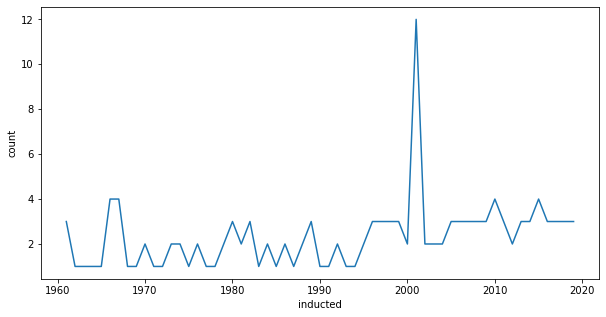

In [17]:
#2001 has 12 inductees
fig, ax = plt.subplots(figsize=(10,5))
line = sns.lineplot(data=ind_per_year, x='inducted', y='count')